<a href="https://colab.research.google.com/github/rishav197/SML-assignments-IIITD/blob/main/Kaggle2/sml_kaggle2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
device_list = tf.test.gpu_device_name()
device_list

'/device:GPU:0'

In [ ]:
import os

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import glob # To find image paths
from google.colab.patches import cv2_imshow

from tensorflow.keras import layers, models

read images for X_train

In [ ]:
img_lst = glob.glob("/content/drive/MyDrive/Data_sml_kaggle2/SML_Train/*.jpg")

img_paths = []
path = "/content/drive/MyDrive/Data_sml_kaggle2/SML_Train/Train_"
for idx in range(16000):
  print(idx)
  img = path + str(idx) + ".jpg"
  # print(img)
  img_paths.append(img)
  
print(len(img_paths), img_paths[len(img_paths)-1])

img_size = 64
X_train = np.empty((len(img_paths), img_size, img_size))
# X_train


for idx in range(len(img_paths)):
  img = cv2.imread(img_paths[idx])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converting into gray image
  X_train[idx]=img
  # print(idx)


Streaming output truncated to the last 5000 lines.
11001
11002
11003
11004
11005
11006
11007
11008
11009
11010
11011
11012
11013
11014
11015
11016
11017
11018
11019
11020
11021
11022
11023
11024
11025
11026
11027
11028
11029
11030
11031
11032
11033
11034
11035
11036
11037
11038
11039
11040
11041
11042
11043
11044
11045
11046
11047
11048
11049
11050
11051
11052
11053
11054
11055
11056
11057
11058
11059
11060
11061
11062
11063
11064
11065
11066
11067
11068
11069
11070
11071
11072
11073
11074
11075
11076
11077
11078
11079
11080
11081
11082
11083
11084
11085
11086
11087
11088
11089
11090
11091
11092
11093
11094
11095
11096
11097
11098
11099
11100
11101
11102
11103
11104
11105
11106
11107
11108
11109
11110
11111
11112
11113
11114
11115
11116
11117
11118
11119
11120
11121
11122
11123
11124
11125
11126
11127
11128
11129
11130
11131
11132
11133
11134
11135
11136
11137
11138
11139
11140
11141
11142
11143
11144
11145
11146
11147
11148
11149
11150
11151
11152
11153
11154
11155
11156
11157
11158
1

In [ ]:
X_train.shape

(16000, 64, 64)

In [ ]:
y_train_df = pd.read_csv("/content/drive/MyDrive/Data_sml_kaggle2/SML_Train.csv")

y_train = np.array(y_train_df.drop(['id'], axis=1))
# print(y_train)

y_train = y_train.reshape(-1,)
print(len(y_train), y_train.shape)
print(len(np.unique(y_train)), np.unique(y_train))

16000 (16000,)
25 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


read images for X_test

In [ ]:
img_lst = glob.glob("/content/drive/MyDrive/Data_sml_kaggle2/SML_Test/*.jpg")
# print(len(img_lst), img_lst)
img_lst.sort()
# print(len(img_lst), img_lst)


img_paths = []
path = "/content/drive/MyDrive/Data_sml_kaggle2/SML_Test/Test_"
for idx in range(len(img_lst)):
  print(idx)
  img = path + str(idx) + ".jpg"
  # print(img)
  img_paths.append(img)
  
print(len(img_paths), img_paths[len(img_paths)-1])

img_size = 64
X_test = np.empty((len(img_paths), img_size, img_size))
# X_test


for idx in range(len(img_paths)):
  img = cv2.imread(img_paths[idx])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converting into gray image
  X_test[idx]=img
  # print(idx)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
print(X_test.shape)
print(X_test[0].shape)

len(X_test[0])
# print(X_test[0][0])

(1500, 64, 64)
(64, 64)


64

In [ ]:
# X_test = X_test.reshape(len(X_test), 64*64)

In [ ]:
# X_test

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)


(16000, 64, 64)
(16000,)
(1500, 64, 64)


17


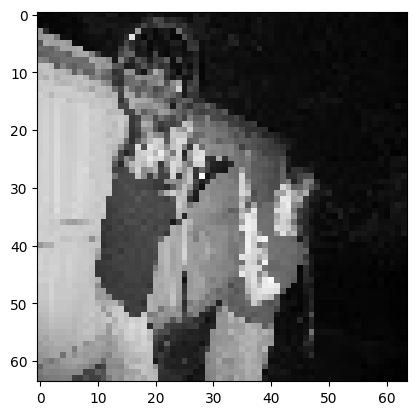

In [ ]:
print(y_train[5])
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))

In [ ]:
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.layers import Activation, Dropout, Flatten, Dense

import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from time import time
import numpy as np

In [ ]:
# Model parameters
shape_of_img = (64,64,1)

input_img = Input(shape=shape_of_img)
print(input_img)

KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32, name='input_4'), name='input_4', description="created by layer 'input_4'")


In [ ]:
import joblib

#### VGG11

In [ ]:
# model = Sequential(name="VGG11")

# # Block1
# model.add(Conv2D(input_shape=shape_of_img, filters=64, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# # Block2
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# # Block3
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# # Block4
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# # Block5
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# #Network
# model.add(Flatten())
# model.add(Dense(units=4096, activation="relu"))
# model.add(Dropout(0.5))
# model.add(Dense(units=4096, activation="relu"))
# model.add(Dropout(0.5))
# model.add(Dense(units=25, activation="softmax"))

#### VGG16

In [ ]:
# model = Sequential(name="VGG16")

# # Block1
# model.add(Conv2D(input_shape=shape_of_img, filters=64, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# # Block2
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# # Block3
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# # Block4
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# # Block5
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# #Network
# model.add(Flatten())
# model.add(Dense(units=4096, activation="relu"))
# model.add(Dropout(0.5))
# model.add(Dense(units=4096, activation="relu"))
# model.add(Dropout(0.5))
# model.add(Dense(units=25, activation="softmax"))

#### AlexNet architecture

In [ ]:
# def alexnet(input_shape, n_classes):
#   input = Input(input_shape)
  
#   # actually batch normalization didn't exist back then
#   # they used LRN (Local Response Normalization) for regularization
#   x = Conv2D(96, 11, strides=4, padding='same', activation='relu')(input)
#   x = BatchNormalization()(x)
#   x = MaxPool2D(3, strides=2)(x)
  
#   x = Conv2D(256, 5, padding='same', activation='relu')(x)
#   x = BatchNormalization()(x)
#   x = MaxPool2D(3, strides=2)(x)
  
#   x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
#   x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
#   x = Conv2D(256, 3, strides=1, padding='same', activation='relu')(x)
#   x = BatchNormalization()(x)
#   x = MaxPool2D(3, strides=2)(x)
  
#   x = Flatten()(x)
#   x = Dense(4096, activation='relu')(x)
#   x = Dropout(0.2)(x)
#   x = Dense(4096, activation='relu')(x)
#   x = Dropout(0.2)(x)
  
#   output = Dense(n_classes, activation='softmax')(x)
  
#   model = Model(input, output)
#   return model

#### MobileNet

In [ ]:
def mobilenet(input_shape, n_classes):
  
  def mobilenet_block(x, f, s=1):
    x = DepthwiseConv2D(3, strides=s, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv2D(f, 1, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x
    
    
  input = Input(input_shape)

  x = Conv2D(32, 3, strides=2, padding='same')(input)
  x = BatchNormalization()(x)
  x = ReLU()(x)

  x = mobilenet_block(x, 64)
  x = mobilenet_block(x, 128, 2)
  x = mobilenet_block(x, 128)

  x = mobilenet_block(x, 256, 2)
  x = mobilenet_block(x, 256)

  x = mobilenet_block(x, 512, 2)
  for _ in range(5):
    x = mobilenet_block(x, 512)

  x = mobilenet_block(x, 1024, 2)
  x = mobilenet_block(x, 1024)

  x = GlobalAvgPool2D()(x)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  return model
     

In [ ]:
# input_shape = shape_of_img
# no_of_classes = 25

# K.clear_session()
# model = mobilenet(input_shape, no_of_classes)

#### CNN

In [ ]:
model = Sequential(name="CNN")

# Block1
model.add(Conv2D(input_shape=shape_of_img, filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Block2
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Block3
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))



#Network
model.add(Flatten())
model.add(Dense(units=1024, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1024, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1024, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=25, activation="softmax"))

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 32, 32, 32)        0         
                                                                 
 depthwise_conv2d (Depthwise  (None, 32, 32, 32)       320       
 Conv2D)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128   

In [ ]:
model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model_train_history = model.fit(X_train, y_train, epochs=40, batch_size=64)

Epoch 1/40
250/250 [==============================] - 32s 36ms/step - loss: 3.0557 - accuracy: 0.1286
Epoch 2/40
250/250 [==============================] - 9s 37ms/step - loss: 2.7902 - accuracy: 0.2079
Epoch 3/40
250/250 [==============================] - 9s 37ms/step - loss: 2.6278 - accuracy: 0.2501
Epoch 4/40
250/250 [==============================] - 9s 37ms/step - loss: 2.5012 - accuracy: 0.2771
Epoch 5/40
250/250 [==============================] - 9s 37ms/step - loss: 2.3835 - accuracy: 0.3137
Epoch 6/40
250/250 [==============================] - 9s 37ms/step - loss: 2.2795 - accuracy: 0.3324
Epoch 7/40
250/250 [==============================] - 9s 36ms/step - loss: 2.1787 - accuracy: 0.3618
Epoch 8/40
250/250 [==============================] - 9s 37ms/step - loss: 2.0788 - accuracy: 0.3815
Epoch 9/40
250/250 [==============================] - 9s 37ms/step - loss: 1.9833 - accuracy: 0.4130
Epoch 10/40
250/250 [==============================] - 9s 37ms/step - loss: 1.8907 - accur

In [ ]:
# Save the model as a .pkl file using pickle library
joblib.dump(model, "vgg11.pkl")

In [ ]:
# Save the model as a .pkl file using pickle library
joblib.dump(model, "vgg16.pkl")

In [ ]:
# Save the model as a .pkl file using pickle library
joblib.dump(model, "alexnet.pkl")

In [ ]:
# Save the model as a .pkl file using pickle library
joblib.dump(model, "mobilenet.pkl")

In [ ]:
# Save the model as a .pkl file using pickle library
joblib.dump(model, "cnn.pkl")

In [ ]:
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]
print(len(y_pred), y_pred)

47/47 [==============================] - 1s 10ms/step
1500 [9, 17, 8, 7, 16, 2, 10, 24, 24, 18, 8, 14, 3, 19, 17, 15, 4, 10, 19, 17, 10, 8, 18, 8, 18, 18, 21, 19, 15, 8, 16, 11, 21, 21, 15, 10, 16, 16, 10, 24, 5, 15, 0, 0, 17, 21, 0, 8, 3, 24, 14, 8, 3, 16, 1, 18, 18, 8, 16, 20, 1, 8, 12, 0, 12, 8, 19, 0, 24, 16, 20, 10, 9, 9, 15, 1, 7, 7, 15, 19, 10, 21, 22, 9, 24, 17, 22, 2, 23, 6, 20, 23, 12, 3, 1, 9, 21, 4, 8, 23, 17, 19, 1, 10, 8, 10, 23, 19, 23, 18, 14, 10, 23, 18, 6, 14, 19, 8, 18, 10, 24, 10, 13, 13, 15, 11, 17, 16, 16, 23, 3, 8, 6, 24, 10, 3, 8, 18, 13, 10, 19, 24, 21, 2, 20, 17, 13, 23, 8, 17, 4, 21, 14, 7, 23, 6, 16, 8, 15, 8, 9, 14, 10, 20, 11, 20, 1, 13, 8, 16, 19, 11, 8, 14, 16, 14, 8, 22, 18, 20, 19, 19, 11, 24, 4, 9, 20, 15, 20, 15, 0, 19, 8, 16, 8, 11, 15, 15, 18, 12, 10, 10, 16, 15, 23, 1, 21, 19, 16, 5, 5, 14, 2, 20, 23, 6, 2, 19, 18, 17, 4, 8, 23, 18, 9, 18, 20, 4, 8, 20, 10, 13, 23, 18, 6, 6, 23, 15, 10, 23, 3, 4, 10, 12, 20, 22, 17, 13, 10, 6, 16, 23, 16, 8, 9, 0,

In [ ]:
submission_df = pd.read_csv("/content/drive/MyDrive/Data_sml_kaggle2/sample_submission.csv")
submission_df.columns

Index(['id', 'category'], dtype='object')

In [ ]:
y_pred_df = pd.DataFrame(y_pred, columns=['category']) 

id_vals = [("Test_"+str(num)+".jpg") for num in range(len(y_pred))]
print(len(id_vals), id_vals)

y_pred_df.insert(0, 'id', id_vals)
# y_pred_df

y_pred_df.to_csv("pred1.csv", encoding='utf-8', index=False)

1500 ['Test_0.jpg', 'Test_1.jpg', 'Test_2.jpg', 'Test_3.jpg', 'Test_4.jpg', 'Test_5.jpg', 'Test_6.jpg', 'Test_7.jpg', 'Test_8.jpg', 'Test_9.jpg', 'Test_10.jpg', 'Test_11.jpg', 'Test_12.jpg', 'Test_13.jpg', 'Test_14.jpg', 'Test_15.jpg', 'Test_16.jpg', 'Test_17.jpg', 'Test_18.jpg', 'Test_19.jpg', 'Test_20.jpg', 'Test_21.jpg', 'Test_22.jpg', 'Test_23.jpg', 'Test_24.jpg', 'Test_25.jpg', 'Test_26.jpg', 'Test_27.jpg', 'Test_28.jpg', 'Test_29.jpg', 'Test_30.jpg', 'Test_31.jpg', 'Test_32.jpg', 'Test_33.jpg', 'Test_34.jpg', 'Test_35.jpg', 'Test_36.jpg', 'Test_37.jpg', 'Test_38.jpg', 'Test_39.jpg', 'Test_40.jpg', 'Test_41.jpg', 'Test_42.jpg', 'Test_43.jpg', 'Test_44.jpg', 'Test_45.jpg', 'Test_46.jpg', 'Test_47.jpg', 'Test_48.jpg', 'Test_49.jpg', 'Test_50.jpg', 'Test_51.jpg', 'Test_52.jpg', 'Test_53.jpg', 'Test_54.jpg', 'Test_55.jpg', 'Test_56.jpg', 'Test_57.jpg', 'Test_58.jpg', 'Test_59.jpg', 'Test_60.jpg', 'Test_61.jpg', 'Test_62.jpg', 'Test_63.jpg', 'Test_64.jpg', 'Test_65.jpg', 'Test_66.jpg',